In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import MaxNLocator

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Display first row columns and data of 'Measurement' in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f89616b4cd0>,
 'id': 0,
 'prcp': 2.0,
 'tobs': 18.3,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
# Display first row columns and data of 'Station' in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f89513b30d0>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 0,
 'elevation': 0.914}

In [11]:
# Find the most recent date in the data set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d') - relativedelta(years = 1)
print(one_year_ago)

2016-08-23 00:00:00


In [14]:
# Perform a query to retrieve the data and precipitation scores
year_prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
print(year_prcp_data)

[('2016-08-24', 2.0), ('2016-08-25', 2.0), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.3), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 3.3), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.8), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 1.3), ('2016-09-08', 0.0), ('2016-09-09', 0.8), ('2016-09-10', 0.0), ('2016-09-11', 1.3), ('2016-09-12', 0.0), ('2016-09-13', 0.5), ('2016-09-14', 33.5), ('2016-09-15', 10.7), ('2016-09-16', 1.5), ('2016-09-17', 1.3), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.5), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 1.5), ('2016-09-27', 0.5), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 0.0), ('2016-1

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_prcp_data_df = pd.DataFrame(year_prcp_data, columns = ['Date', 'Precipitation'])

# Convert 'Date' column to datetime format
year_prcp_data_df['Date'] = pd.to_datetime(year_prcp_data_df['Date'])

# Convert 'Precipitation' column to float
year_prcp_data_df['Precipitation'] = year_prcp_data_df['Precipitation'].astype(float)

year_prcp_data_df.head()

,Date,Precipitation
0,2016-08-24,2.0
1,2016-08-25,2.0
2,2016-08-26,0.0
3,2016-08-27,0.0
4,2016-08-28,0.3


In [16]:
# Sort the dataframe by date
year_prcp_data_df = year_prcp_data_df.sort_values(by=['Date']).dropna(how='any')
year_prcp_data_df = year_prcp_data_df.reset_index(drop=True)
year_prcp_data_df.dtypes

Date             datetime64[ns]
Precipitation           float64
dtype: object

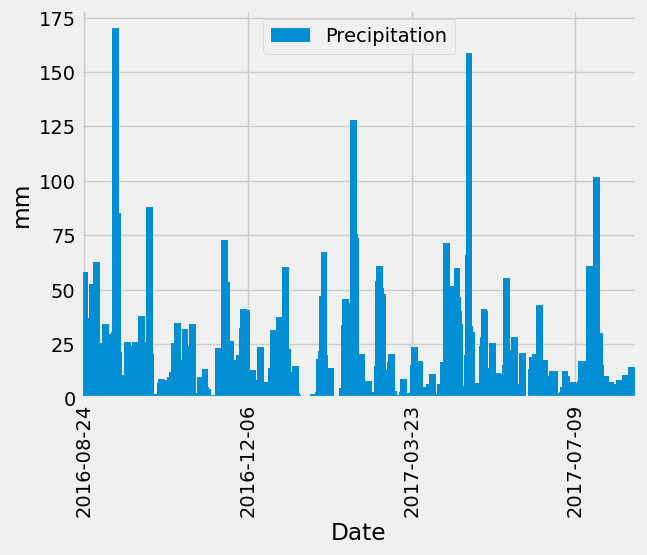

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create x tick labels in yyy-mmm-dd format
xtick_labels = year_prcp_data_df['Date'].dt.strftime('%Y-%m-%d').tolist()

# Plot the DataFrame as a bar chart
ax = year_prcp_data_df.plot.bar("Date", "Precipitation", width=25)

# Set the x-axis label and tick labels
ax.set_xlabel("Date")
ax.set_xticklabels([])
ax.set_xticklabels(xtick_labels, rotation=90, ha='center')
ax.xaxis.set_major_locator(plticker.MaxNLocator(4))

# Set the y-axis label and tick labels
ax.set_ylabel("mm")
ax.set_yticks(range(0, 200, 25))

# Display the plot
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = pd.DataFrame(year_prcp_data_df.describe())
summary


,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).distinct().count()
print(f"There are {station_count} stations")

There are 9 stations


In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = station_activity[0]
temp_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == top_station[0])
temp_query.one()

(12.2, 29.4, 22.03582251082252)

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year_ago).filter(Measurement.station == top_station[0]).all()
year_temp_data_df = pd.DataFrame(year_temp_data, columns = ['Station', 'Date', 'tobs']).sort_values('Date')

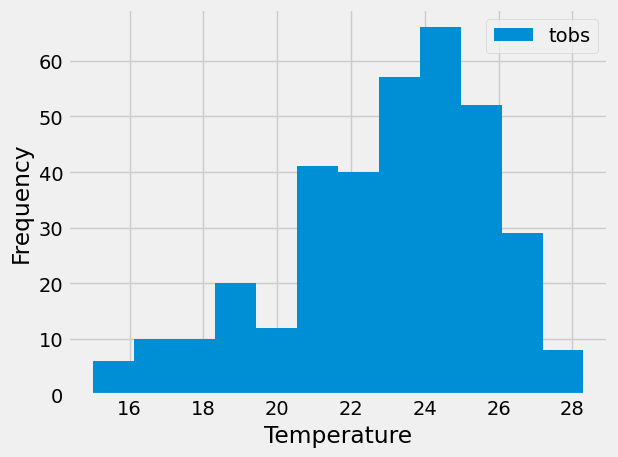

In [29]:

# Plot temperature histogram
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

year_temp_data_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

# Close Session

In [30]:
# Close Session
session.close()